<a href="https://colab.research.google.com/github/chrissaba3/COVID-19-NN/blob/main/Covid_Data_Processing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [16]:
import io
import pandas as pd
from google.colab import files
from pandas import DataFrame as df
from matplotlib import pyplot as plt

In [2]:
def to_catigorical(data,feature):
  temp = ['N'] * data.shape[0]
  for i in range(data.shape[0]):
    if data[feature][i] == 1:
      temp[i] = 'Y'
  return temp

In [3]:
data_file = files.upload()
data = pd.read_csv(io.BytesIO(data_file['formatted_data_age_ranges.csv']))

Saving formatted_data_age_ranges.csv to formatted_data_age_ranges (2).csv


In [4]:
data_copy = data.iloc[:,1:].copy()

print(data_copy)
data_copy.head()

      [0-4]  [5-17]  [18-29]  [30-39]  ...  icu  intubed  patient_type  deceased
0         0       0        1        0  ...    0        0             1         0
1         0       0        1        0  ...    0        0             1         0
2         0       0        0        0  ...    2        2             2         0
3         0       0        0        1  ...    2        2             2         0
4         0       0        0        0  ...    2        2             2         1
...     ...     ...      ...      ...  ...  ...      ...           ...       ...
8187      0       0        0        0  ...    0        0             1         0
8188      0       0        0        0  ...    0        0             1         0
8189      0       0        0        0  ...    0        0             1         0
8190      0       0        0        0  ...    0        0             1         0
8191      0       0        0        0  ...    2        2             2         0

[8192 rows x 26 columns]


,[0-4],[5-17],[18-29],[30-39],[40-49],[50-64],[65-74],[74-84],85+,age,pregnancy,diabetes,copd,asthma,inmsupr,hypertension,other_diseaase,cardiovascular,obesity,renal_chronic,tobacco,pneumonia,icu,intubed,patient_type,deceased
0,0,0,1,0,0,0,0,0,0,27,97,2,2,2,2,2,2,2,2,2,2,2,0,0,1,0
1,0,0,1,0,0,0,0,0,0,24,97,2,2,2,2,2,2,2,2,2,2,2,0,0,1,0
2,0,0,0,0,0,1,0,0,0,54,2,2,2,2,2,2,2,2,1,2,2,2,2,2,2,0
3,0,0,0,1,0,0,0,0,0,30,97,2,2,2,2,2,2,2,2,2,2,1,2,2,2,0
4,0,0,0,0,0,1,0,0,0,60,2,1,2,2,2,1,2,1,2,2,2,2,2,2,2,1


In [5]:
# converting age from single feature, to multiple based on ranges:
# [0-4], [5-17], [18-29], [30-39], [40-49], [50-64], [65-74], [75-84],[85+]

fill = data_copy.iloc[:,:].copy()
ranges = pd.DataFrame(columns=['0-4', '5-17', '18-29','30-39','40-49','50-64','65-74','75-84','85'])


range_0_4_ =[0] * 8192
range_5_17_ =[0] * 8192
range_18_29_ =[0] * 8192
range_30_39_ =[0] * 8192
range_40_49_ =[0] * 8192
range_50_64_ =[0] * 8192
range_65_74_ =[0] * 8192
range_75_84_ =[0] * 8192
range_85_ = [0] * 8192
  
for i in range(0,8192):
    if data_copy['age'][i] <= 4:
      range_0_4_[i] = 1
    elif data_copy['age'][i] >= 5 and data_copy['age'][i] <= 17:
      range_5_17_[i] = 1
    elif data_copy['age'][i] >= 18 and data_copy['age'][i] <= 29:
      range_18_29_[i] = 1
    elif data_copy['age'][i] >= 30 and data_copy['age'][i] <= 39:
      range_30_39_[i] = 1
    elif data_copy['age'][i] >= 40 and data_copy['age'][i] <= 49:
      range_40_49_[i] = 1
    elif data_copy['age'][i] >= 50 and data_copy['age'][i] <= 64:
      range_50_64_[i] = 1
    elif data_copy['age'][i] >= 65 and data_copy['age'][i] <= 74:
      range_65_74_[i] = 1
    elif data_copy['age'][i] >= 75 and data_copy['age'][i] <= 84:
      range_75_84_[i] = 1
    if data_copy['age'][i] >= 85:
      range_85_[i] = 1




In [6]:
# age_range = df = pd.DataFrame(data=[range_0_4_,range_5_17_,range_18_29_,range_30_39_,range_40_49_,range_50_64_,range_65_74_,range_75_84_,range_85_],
#                               columns=['0-4', '5-17', '18-29', '30-39', '40-49', '50-64', '65-74', '75-84','85+'])


df_range_0_4_  = pd.DataFrame(range_0_4_,columns=['[0-4]'])
df_range_5_17_  = pd.DataFrame(range_5_17_,columns=['[5-17]'])
df_range_18_29_  = pd.DataFrame(range_18_29_,columns=['[18-29]'])
df_range_30_39_  = pd.DataFrame(range_30_39_,columns=['[30-39]'])
df_range_40_49_  = pd.DataFrame(range_40_49_,columns=['[40-49]'])
df_range_50_64_  = pd.DataFrame(range_50_64_,columns=['[50-64]'])
df_range_65_74_  = pd.DataFrame(range_65_74_,columns=['[65-74]'])
df_range_75_84_  = pd.DataFrame(range_75_84_,columns=['[74-84]'])
df_range_85_  = pd.DataFrame(range_85_,columns=['[85]'])


df_range_0_4_.to_csv('ages0-4.csv')
df_range_5_17_.to_csv('ages5-17.csv')
df_range_18_29_.to_csv('ages18-29.csv')
df_range_30_39_.to_csv('ages30-39.csv')
df_range_40_49_.to_csv('ages40-49.csv')
df_range_50_64_.to_csv('ages50-64.csv')
df_range_65_74_.to_csv('ages65-74.csv')
df_range_75_84_.to_csv('ages75-84.csv')
df_range_85_.to_csv('ages85.csv')


In [3]:
full_data_set = files.upload()

Saving covid.csv to covid (1).csv


In [23]:
data = pd.read_csv(io.BytesIO(full_data_set['covid.csv']))
data.head()

,id,sex,patient_type,entry_date,date_symptoms,date_died,intubed,pneumonia,age,pregnancy,diabetes,copd,asthma,inmsupr,hypertension,other_disease,cardiovascular,obesity,renal_chronic,tobacco,contact_other_covid,covid_res,icu
0,16169f,2,1,04-05-2020,02-05-2020,9999-99-99,97,2,27,97,2,2,2,2,2,2,2,2,2,2,2,1,97
1,1009bf,2,1,19-03-2020,17-03-2020,9999-99-99,97,2,24,97,2,2,2,2,2,2,2,2,2,2,99,1,97
2,167386,1,2,06-04-2020,01-04-2020,9999-99-99,2,2,54,2,2,2,2,2,2,2,2,1,2,2,99,1,2
3,0b5948,2,2,17-04-2020,10-04-2020,9999-99-99,2,1,30,97,2,2,2,2,2,2,2,2,2,2,99,1,2
4,0d01b5,1,2,13-04-2020,13-04-2020,22-04-2020,2,2,60,2,1,2,2,2,1,2,1,2,2,2,99,1,2


In [24]:
data_copy = data.drop(columns=['id'])

In [25]:
data_copy = data_copy.drop(columns=['entry_date'])

In [26]:
data_copy = data_copy.drop(columns=['date_symptoms'])

In [27]:
deceased  = ['N']* data_copy.shape[0]
for i in range(data_copy.shape[0]):
  if data_copy['date_died'][i] != "9999-99-99":
    deceased[i] = 'Y'




In [28]:
data_copy['deceased'] = deceased

In [29]:
pat_type = ['IN']* data_copy.shape[0]
for i in range(data_copy.shape[0]):
  if data_copy['patient_type'][i] == 1:
    pat_type[i] = 'OUT'



In [30]:
data_copy['patient_type'] = pat_type
data_copy.head()

,sex,patient_type,date_died,intubed,pneumonia,age,pregnancy,diabetes,copd,asthma,inmsupr,hypertension,other_disease,cardiovascular,obesity,renal_chronic,tobacco,contact_other_covid,covid_res,icu,deceased
0,2,OUT,9999-99-99,97,2,27,97,2,2,2,2,2,2,2,2,2,2,2,1,97,N
1,2,OUT,9999-99-99,97,2,24,97,2,2,2,2,2,2,2,2,2,2,99,1,97,N
2,1,IN,9999-99-99,2,2,54,2,2,2,2,2,2,2,2,1,2,2,99,1,2,N
3,2,IN,9999-99-99,2,1,30,97,2,2,2,2,2,2,2,2,2,2,99,1,2,N
4,1,IN,22-04-2020,2,2,60,2,1,2,2,2,1,2,1,2,2,2,99,1,2,Y


In [31]:
data_copy.head()

,sex,patient_type,date_died,intubed,pneumonia,age,pregnancy,diabetes,copd,asthma,inmsupr,hypertension,other_disease,cardiovascular,obesity,renal_chronic,tobacco,contact_other_covid,covid_res,icu,deceased
0,2,OUT,9999-99-99,97,2,27,97,2,2,2,2,2,2,2,2,2,2,2,1,97,N
1,2,OUT,9999-99-99,97,2,24,97,2,2,2,2,2,2,2,2,2,2,99,1,97,N
2,1,IN,9999-99-99,2,2,54,2,2,2,2,2,2,2,2,1,2,2,99,1,2,N
3,2,IN,9999-99-99,2,1,30,97,2,2,2,2,2,2,2,2,2,2,99,1,2,N
4,1,IN,22-04-2020,2,2,60,2,1,2,2,2,1,2,1,2,2,2,99,1,2,Y


In [32]:
catigorical_features = ['intubed','pneumonia','pregnancy','diabetes','copd','asthma','inmsupr','hypertension','other_disease','cardiovascular','obesity'
                         ,'renal_chronic','tobacco','contact_other_covid','covid_res','icu']

for feature in catigorical_features:
  data_copy[feature] = to_catigorical(data_copy,feature)


data_copy.head()

,sex,patient_type,date_died,intubed,pneumonia,age,pregnancy,diabetes,copd,asthma,inmsupr,hypertension,other_disease,cardiovascular,obesity,renal_chronic,tobacco,contact_other_covid,covid_res,icu,deceased
0,2,OUT,9999-99-99,N,N,27,N,N,N,N,N,N,N,N,N,N,N,N,Y,N,N
1,2,OUT,9999-99-99,N,N,24,N,N,N,N,N,N,N,N,N,N,N,N,Y,N,N
2,1,IN,9999-99-99,N,N,54,N,N,N,N,N,N,N,N,Y,N,N,N,Y,N,N
3,2,IN,9999-99-99,N,Y,30,N,N,N,N,N,N,N,N,N,N,N,N,Y,N,N
4,1,IN,22-04-2020,N,N,60,N,Y,N,N,N,Y,N,Y,N,N,N,N,Y,N,Y


In [33]:
sex = ['M']* data_copy.shape[0]
for i in range(data_copy.shape[0]):
  if data_copy['sex'][i] == 1:
    sex[i] = 'F'


In [34]:
data_copy['sex'] = sex
data_copy.head()

,sex,patient_type,date_died,intubed,pneumonia,age,pregnancy,diabetes,copd,asthma,inmsupr,hypertension,other_disease,cardiovascular,obesity,renal_chronic,tobacco,contact_other_covid,covid_res,icu,deceased
0,M,OUT,9999-99-99,N,N,27,N,N,N,N,N,N,N,N,N,N,N,N,Y,N,N
1,M,OUT,9999-99-99,N,N,24,N,N,N,N,N,N,N,N,N,N,N,N,Y,N,N
2,F,IN,9999-99-99,N,N,54,N,N,N,N,N,N,N,N,Y,N,N,N,Y,N,N
3,M,IN,9999-99-99,N,Y,30,N,N,N,N,N,N,N,N,N,N,N,N,Y,N,N
4,F,IN,22-04-2020,N,N,60,N,Y,N,N,N,Y,N,Y,N,N,N,N,Y,N,Y


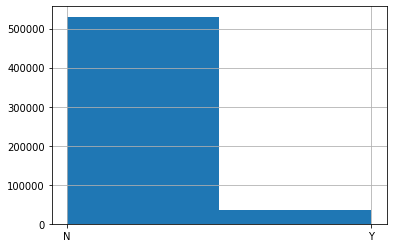

In [15]:
data_copy.deceased.hist(bins = 2)

In [35]:
data_copy = data_copy.drop(columns=['date_died'])
data_copy.head()

,sex,patient_type,intubed,pneumonia,age,pregnancy,diabetes,copd,asthma,inmsupr,hypertension,other_disease,cardiovascular,obesity,renal_chronic,tobacco,contact_other_covid,covid_res,icu,deceased
0,M,OUT,N,N,27,N,N,N,N,N,N,N,N,N,N,N,N,Y,N,N
1,M,OUT,N,N,24,N,N,N,N,N,N,N,N,N,N,N,N,Y,N,N
2,F,IN,N,N,54,N,N,N,N,N,N,N,N,Y,N,N,N,Y,N,N
3,M,IN,N,Y,30,N,N,N,N,N,N,N,N,N,N,N,N,Y,N,N
4,F,IN,N,N,60,N,Y,N,N,N,Y,N,Y,N,N,N,N,Y,N,Y


In [17]:
from google.colab import drive
drive.mount('drive')

Mounted at drive


In [37]:
data_copy.to_csv('covid_categorical.csv')
!cp covid_categorical.csv"drive/My Drive/"

cp: missing destination file operand after 'covid_categorical.csvdrive/My Drive/'
Try 'cp --help' for more information.
